<a href="https://colab.research.google.com/github/nikitatkachev096/ML_-/blob/main/Maximum_Education_pet_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving Data_with_prep_23.03.csv to Data_with_prep_23.03.csv


- student_id                     | id студента   
- student_email                  | email студента
- group_id                       | кол-во курсов (group by student_id_lms)
- group_title                    | кол-во курсов (group by student_id_lms)
- prep_email                     | email преподавателя
- date_first_l                   | дата первого урока
- feat_group_size                | кол-во курсов (group by student_id_lms)
- feat_attendance                | средняя посещаемость (student_id_lms, group_id)   
- feat_HW                        | средний процент решения ДЗ (по темам)
- feat_HW_righ                   | средний процент верно решенного ДЗ (по темам)
- feat_theory_read               | среднее прочтение теории (student_id_lms, group_id)
- feat_TK                        | средний процент выполнения ТК
- feat_TK_right                  | средний процент верно выполненных ТК
- feat_LB                        | кол-во посещенных ЛБ
- feat_tickets_we_need           | кол-во заявок в сервис, которые нас интересуют
- feat_tickets_mb_term           | кол-во заявок в сервис с подозрением на расторжение
- feat_payment_type              | тип платы
- feat_payment_place             | место покупки
- feat_term_perc                 | средний процент расторжения у менеджера
- feat_good_agr_before           | есть ли какой-либо нерасторгнутый договор у ученика
- target                         | таргет (расторжение)
- feat_prep_attendence           | средняя посещаемость у преподавателя (по итогам рейтинга)
- feat_prep_HW                   | среднее ДЗ у преподавателя (по итогам рейтинга)
- feat_prep_SIM                  | средние результаты СИМ у преподавателя (по итогам рейтинга)
- feat_prep_OpenLessons          | средняя оценка ОУ у преподавателя (по итогам рейтинга)


In [5]:
df = pd.read_csv('Data_with_prep_23.03.csv', sep=';')

df['feat_group_format']

,feat_group_format
0,Блендед
1,Блендед
2,Блендед
3,Блендед
4,Блендед
...,...
67333,Мини
67334,Мини
67335,Мини
67336,Мини


In [6]:
df['feat_group_format'] = df['feat_group_format'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67338 entries, 0 to 67337
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Unnamed: 0             67338 non-null  int64   
 1   student_id             67338 non-null  int64   
 2   student_email          67338 non-null  object  
 3   group_id               67338 non-null  int64   
 4   group_title            67338 non-null  object  
 5   prep_email             67338 non-null  object  
 6   date_first_l           67338 non-null  object  
 7   feat_class             67338 non-null  int64   
 8   feat_group_format      67338 non-null  category
 9   feat_group_weeks       67338 non-null  int64   
 10  feat_group_size        67338 non-null  int64   
 11  feat_attendance        67338 non-null  float64 
 12  feat_HW                67338 non-null  float64 
 13  feat_HW_right          67338 non-null  float64 
 14  feat_theory_read       67338 non-null 

In [7]:
df = df.drop(['Unnamed: 0', 'student_id', 'student_email', 'group_id', 'group_title', 'prep_email', 'date_first_l'], axis=1)

df

,feat_class,feat_group_format,feat_group_weeks,feat_group_size,feat_attendance,feat_HW,feat_HW_right,feat_theory_read,feat_TK,feat_LB,feat_tickets_we_need,feat_tickets_mb_term,feat_payment_type,feat_payment_place,feat_term_perc,feat_good_agr_before,target,feat_prep_attendence,feat_prep_HW,feat_prep_OpenLessons
0,10,Блендед,17,7,1.00,0.79,0.73,0.32,1.0,3,0,0,Единовременная,ИK,27.65,1,0,0.929787,0.737176,4.658626
1,10,Блендед,17,7,0.43,0.47,0.40,0.31,0.0,1,0,0,Единовременная,ИK,34.43,1,1,0.929787,0.737176,4.658626
2,10,Блендед,17,7,1.00,0.25,0.24,0.22,1.0,3,3,0,Позтапная,ИK,25.93,1,0,0.929787,0.737176,4.658626
3,10,Блендед,17,7,1.00,0.81,0.65,0.41,1.0,3,1,0,Единовременная,ИK,34.43,1,0,0.929787,0.737176,4.658626
4,10,Блендед,17,7,1.00,0.24,0.21,0.56,1.0,3,3,0,Материнский капитал,ИK,20.28,1,0,0.929787,0.737176,4.658626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67333,9,Мини,21,11,0.90,0.26,0.22,0.06,0.4,1,0,0,Единовременная,ИK,28.53,1,0,0.929787,0.930000,5.000000
67334,9,Мини,21,11,0.95,0.42,0.36,0.23,0.5,2,0,0,Материнский капитал,ИK,15.15,1,0,0.929787,0.930000,5.000000
67335,9,Мини,21,11,1.00,0.65,0.53,1.00,0.8,2,0,0,Единовременная,ИK,15.05,1,0,0.929787,0.930000,5.000000
67336,9,Мини,21,11,1.00,0.81,0.56,1.00,1.0,0,0,0,Единовременная,ИK,19.56,1,0,0.929787,0.930000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67338 entries, 0 to 67337
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   feat_class             67338 non-null  int64   
 1   feat_group_format      67338 non-null  category
 2   feat_group_weeks       67338 non-null  int64   
 3   feat_group_size        67338 non-null  int64   
 4   feat_attendance        67338 non-null  float64 
 5   feat_HW                67338 non-null  float64 
 6   feat_HW_right          67338 non-null  float64 
 7   feat_theory_read       67338 non-null  float64 
 8   feat_TK                67338 non-null  float64 
 9   feat_LB                67338 non-null  int64   
 10  feat_tickets_we_need   67338 non-null  int64   
 11  feat_tickets_mb_term   67338 non-null  int64   
 12  feat_payment_type      67338 non-null  object  
 13  feat_payment_place     67338 non-null  object  
 14  feat_term_perc         67338 non-null 

In [15]:
df[['feat_payment_type', 'feat_payment_place']] = df[['feat_payment_type', 'feat_payment_place']].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67338 entries, 0 to 67337
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   feat_class             67338 non-null  int64   
 1   feat_group_format      67338 non-null  category
 2   feat_group_weeks       67338 non-null  int64   
 3   feat_group_size        67338 non-null  int64   
 4   feat_attendance        67338 non-null  float64 
 5   feat_HW                67338 non-null  float64 
 6   feat_HW_right          67338 non-null  float64 
 7   feat_theory_read       67338 non-null  float64 
 8   feat_TK                67338 non-null  float64 
 9   feat_LB                67338 non-null  int64   
 10  feat_tickets_we_need   67338 non-null  int64   
 11  feat_tickets_mb_term   67338 non-null  int64   
 12  feat_payment_type      67338 non-null  category
 13  feat_payment_place     67338 non-null  category
 14  feat_term_perc         67338 non-null 

In [16]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = df[numeric_cols]

category_cols = df.select_dtypes(include=['category']).columns
category_df = df[category_cols]

category_df

,feat_group_format,feat_payment_type,feat_payment_place
0,Блендед,Единовременная,ИK
1,Блендед,Единовременная,ИK
2,Блендед,Позтапная,ИK
3,Блендед,Единовременная,ИK
4,Блендед,Материнский капитал,ИK
...,...,...,...
67333,Мини,Единовременная,ИK
67334,Мини,Материнский капитал,ИK
67335,Мини,Единовременная,ИK
67336,Мини,Единовременная,ИK


In [17]:
category_df['feat_payment_place'].value_counts()

,count
feat_payment_place,
ИK,52235
Навигатор,10137
Cepвep,4227
ИК,285
Cайт,251
ДОД,203


In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
ohe = OneHotEncoder(sparse_output=False, dtype=int)
ohe_df = pd.DataFrame(ohe.fit_transform(category_df[['feat_group_format']]), columns=ohe.get_feature_names_out(['feat_group_format']))
encoded_ohe_df = pd.concat([category_df, ohe_df], axis=1) # В том случае, если хотим добавить закодированные данные



In [20]:
ohe = OneHotEncoder(sparse_output=False, dtype=int)
ohe_df_1 = pd.DataFrame(ohe.fit_transform(category_df[['feat_payment_type']]), columns=ohe.get_feature_names_out(['feat_payment_type']))
encoded_ohe_df = pd.concat([encoded_ohe_df, ohe_df_1], axis=1) # В том случае, если хотим добавить закодированные данные

encoded_ohe_df

,feat_group_format,feat_payment_type,feat_payment_place,feat_group_format_Блендед,feat_group_format_Микро,feat_group_format_Мини,feat_group_format_Онлайн+Класс,feat_group_format_Стандарт,feat_payment_type_Kомбо,feat_payment_type_Paccpoчка банка,feat_payment_type_Бронирование,feat_payment_type_Буст,feat_payment_type_Единовременная,feat_payment_type_Материнский капитал,feat_payment_type_Позтапная,feat_payment_type_Рекуррентная
0,Блендед,Единовременная,ИK,1,0,0,0,0,0,0,0,0,1,0,0,0
1,Блендед,Единовременная,ИK,1,0,0,0,0,0,0,0,0,1,0,0,0
2,Блендед,Позтапная,ИK,1,0,0,0,0,0,0,0,0,0,0,1,0
3,Блендед,Единовременная,ИK,1,0,0,0,0,0,0,0,0,1,0,0,0
4,Блендед,Материнский капитал,ИK,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67333,Мини,Единовременная,ИK,0,0,1,0,0,0,0,0,0,1,0,0,0
67334,Мини,Материнский капитал,ИK,0,0,1,0,0,0,0,0,0,0,1,0,0
67335,Мини,Единовременная,ИK,0,0,1,0,0,0,0,0,0,1,0,0,0
67336,Мини,Единовременная,ИK,0,0,1,0,0,0,0,0,0,1,0,0,0


In [21]:
ohe = OneHotEncoder(sparse_output=False, dtype=int)
ohe_df_2 = pd.DataFrame(ohe.fit_transform(category_df[['feat_payment_place']]), columns=ohe.get_feature_names_out(['feat_payment_place']))
encoded_ohe_df = pd.concat([encoded_ohe_df, ohe_df_2], axis=1) # В том случае, если хотим добавить закодированные данные

encoded_ohe_df

,feat_group_format,feat_payment_type,feat_payment_place,feat_group_format_Блендед,feat_group_format_Микро,feat_group_format_Мини,feat_group_format_Онлайн+Класс,feat_group_format_Стандарт,feat_payment_type_Kомбо,feat_payment_type_Paccpoчка банка,...,feat_payment_type_Единовременная,feat_payment_type_Материнский капитал,feat_payment_type_Позтапная,feat_payment_type_Рекуррентная,feat_payment_place_Cepвep,feat_payment_place_Cайт,feat_payment_place_ДОД,feat_payment_place_ИK,feat_payment_place_ИК,feat_payment_place_Навигатор
0,Блендед,Единовременная,ИK,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,Блендед,Единовременная,ИK,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,Блендед,Позтапная,ИK,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,Блендед,Единовременная,ИK,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,Блендед,Материнский капитал,ИK,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67333,Мини,Единовременная,ИK,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
67334,Мини,Материнский капитал,ИK,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
67335,Мини,Единовременная,ИK,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
67336,Мини,Единовременная,ИK,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [22]:
encoded_ohe_df = encoded_ohe_df.drop(['feat_group_format', 'feat_payment_type', 'feat_payment_place'], axis=1)

encoded_ohe_df # датафрейм с закодированными категориальными данными

,feat_group_format_Блендед,feat_group_format_Микро,feat_group_format_Мини,feat_group_format_Онлайн+Класс,feat_group_format_Стандарт,feat_payment_type_Kомбо,feat_payment_type_Paccpoчка банка,feat_payment_type_Бронирование,feat_payment_type_Буст,feat_payment_type_Единовременная,feat_payment_type_Материнский капитал,feat_payment_type_Позтапная,feat_payment_type_Рекуррентная,feat_payment_place_Cepвep,feat_payment_place_Cайт,feat_payment_place_ДОД,feat_payment_place_ИK,feat_payment_place_ИК,feat_payment_place_Навигатор
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67333,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
67334,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
67335,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
67336,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [23]:
numeric_df # датафрейм с некодированными числовыми данными


,feat_class,feat_group_weeks,feat_group_size,feat_attendance,feat_HW,feat_HW_right,feat_theory_read,feat_TK,feat_LB,feat_tickets_we_need,feat_tickets_mb_term,feat_term_perc,feat_good_agr_before,target,feat_prep_attendence,feat_prep_HW,feat_prep_OpenLessons
0,10,17,7,1.00,0.79,0.73,0.32,1.0,3,0,0,27.65,1,0,0.929787,0.737176,4.658626
1,10,17,7,0.43,0.47,0.40,0.31,0.0,1,0,0,34.43,1,1,0.929787,0.737176,4.658626
2,10,17,7,1.00,0.25,0.24,0.22,1.0,3,3,0,25.93,1,0,0.929787,0.737176,4.658626
3,10,17,7,1.00,0.81,0.65,0.41,1.0,3,1,0,34.43,1,0,0.929787,0.737176,4.658626
4,10,17,7,1.00,0.24,0.21,0.56,1.0,3,3,0,20.28,1,0,0.929787,0.737176,4.658626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67333,9,21,11,0.90,0.26,0.22,0.06,0.4,1,0,0,28.53,1,0,0.929787,0.930000,5.000000
67334,9,21,11,0.95,0.42,0.36,0.23,0.5,2,0,0,15.15,1,0,0.929787,0.930000,5.000000
67335,9,21,11,1.00,0.65,0.53,1.00,0.8,2,0,0,15.05,1,0,0.929787,0.930000,5.000000
67336,9,21,11,1.00,0.81,0.56,1.00,1.0,0,0,0,19.56,1,0,0.929787,0.930000,5.000000


In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
numeric_df[['feat_class']] = scaler.fit_transform(numeric_df[['feat_class']])

numeric_df

<ipython-input-25-93680435fdfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[['feat_class']] = scaler.fit_transform(numeric_df[['feat_class']])


,feat_class,feat_group_weeks,feat_group_size,feat_attendance,feat_HW,feat_HW_right,feat_theory_read,feat_TK,feat_LB,feat_tickets_we_need,feat_tickets_mb_term,feat_term_perc,feat_good_agr_before,target,feat_prep_attendence,feat_prep_HW,feat_prep_OpenLessons
0,0.5,17,7,1.00,0.79,0.73,0.32,1.0,3,0,0,27.65,1,0,0.929787,0.737176,4.658626
1,0.5,17,7,0.43,0.47,0.40,0.31,0.0,1,0,0,34.43,1,1,0.929787,0.737176,4.658626
2,0.5,17,7,1.00,0.25,0.24,0.22,1.0,3,3,0,25.93,1,0,0.929787,0.737176,4.658626
3,0.5,17,7,1.00,0.81,0.65,0.41,1.0,3,1,0,34.43,1,0,0.929787,0.737176,4.658626
4,0.5,17,7,1.00,0.24,0.21,0.56,1.0,3,3,0,20.28,1,0,0.929787,0.737176,4.658626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67333,0.0,21,11,0.90,0.26,0.22,0.06,0.4,1,0,0,28.53,1,0,0.929787,0.930000,5.000000
67334,0.0,21,11,0.95,0.42,0.36,0.23,0.5,2,0,0,15.15,1,0,0.929787,0.930000,5.000000
67335,0.0,21,11,1.00,0.65,0.53,1.00,0.8,2,0,0,15.05,1,0,0.929787,0.930000,5.000000
67336,0.0,21,11,1.00,0.81,0.56,1.00,1.0,0,0,0,19.56,1,0,0.929787,0.930000,5.000000


In [30]:
numeric_df['feat_group_weeks'].value_counts()

,count
feat_group_weeks,
33,44565
31,3225
16,2941
21,2690
29,2328
25,2069
24,1743
30,1328
12,1064


In [37]:
scaler = MinMaxScaler()
numeric_df[['feat_group_weeks']] = scaler.fit_transform(numeric_df[['feat_group_weeks']])

numeric_df['feat_group_size'].value_counts()

<ipython-input-37-f460b316520f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[['feat_group_weeks']] = scaler.fit_transform(numeric_df[['feat_group_weeks']])


,count
feat_group_size,
19,4389
15,4155
14,4088
18,4086
13,3965
...,...
65,65
64,64
63,63


In [38]:
scaler = MinMaxScaler()
numeric_df[['feat_group_size']] = scaler.fit_transform(numeric_df[['feat_group_size']])

numeric_df

<ipython-input-38-421d8080f865>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[['feat_group_size']] = scaler.fit_transform(numeric_df[['feat_group_size']])


,feat_class,feat_group_weeks,feat_group_size,feat_attendance,feat_HW,feat_HW_right,feat_theory_read,feat_TK,feat_LB,feat_tickets_we_need,feat_tickets_mb_term,feat_term_perc,feat_good_agr_before,target,feat_prep_attendence,feat_prep_HW,feat_prep_OpenLessons
0,0.5,0.419355,0.031088,1.00,0.79,0.73,0.32,1.0,3,0,0,27.65,1,0,0.929787,0.737176,4.658626
1,0.5,0.419355,0.031088,0.43,0.47,0.40,0.31,0.0,1,0,0,34.43,1,1,0.929787,0.737176,4.658626
2,0.5,0.419355,0.031088,1.00,0.25,0.24,0.22,1.0,3,3,0,25.93,1,0,0.929787,0.737176,4.658626
3,0.5,0.419355,0.031088,1.00,0.81,0.65,0.41,1.0,3,1,0,34.43,1,0,0.929787,0.737176,4.658626
4,0.5,0.419355,0.031088,1.00,0.24,0.21,0.56,1.0,3,3,0,20.28,1,0,0.929787,0.737176,4.658626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67333,0.0,0.548387,0.051813,0.90,0.26,0.22,0.06,0.4,1,0,0,28.53,1,0,0.929787,0.930000,5.000000
67334,0.0,0.548387,0.051813,0.95,0.42,0.36,0.23,0.5,2,0,0,15.15,1,0,0.929787,0.930000,5.000000
67335,0.0,0.548387,0.051813,1.00,0.65,0.53,1.00,0.8,2,0,0,15.05,1,0,0.929787,0.930000,5.000000
67336,0.0,0.548387,0.051813,1.00,0.81,0.56,1.00,1.0,0,0,0,19.56,1,0,0.929787,0.930000,5.000000


In [39]:
numeric_df['feat_LB'].value_counts()

,count
feat_LB,
5,16187
0,12732
4,9802
3,9199
1,8558
2,8083
6,1922
7,658
8,120


In [40]:
numeric_df['feat_tickets_we_need'].value_counts()

,count
feat_tickets_we_need,
0,57803
1,4091
2,2113
3,1316
4,712
5,524
6,286
7,178
8,114


In [41]:
numeric_df['feat_tickets_mb_term'].value_counts()

,count
feat_tickets_mb_term,
0,66172
1,921
2,156
3,57
4,16
5,8
6,4
7,4


In [42]:
scaler = MinMaxScaler()
numeric_df[['feat_LB']] = scaler.fit_transform(numeric_df[['feat_LB']])

scaler = MinMaxScaler()
numeric_df[['feat_tickets_we_need']] = scaler.fit_transform(numeric_df[['feat_tickets_we_need']])


scaler = MinMaxScaler()
numeric_df[['feat_tickets_mb_term']] = scaler.fit_transform(numeric_df[['feat_tickets_mb_term']])

numeric_df

<ipython-input-42-63c62923afb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[['feat_LB']] = scaler.fit_transform(numeric_df[['feat_LB']])
<ipython-input-42-63c62923afb5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[['feat_tickets_we_need']] = scaler.fit_transform(numeric_df[['feat_tickets_we_need']])
<ipython-input-42-63c62923afb5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,feat_class,feat_group_weeks,feat_group_size,feat_attendance,feat_HW,feat_HW_right,feat_theory_read,feat_TK,feat_LB,feat_tickets_we_need,feat_tickets_mb_term,feat_term_perc,feat_good_agr_before,target,feat_prep_attendence,feat_prep_HW,feat_prep_OpenLessons
0,0.5,0.419355,0.031088,1.00,0.79,0.73,0.32,1.0,0.111111,0.000000,0.0,27.65,1,0,0.929787,0.737176,4.658626
1,0.5,0.419355,0.031088,0.43,0.47,0.40,0.31,0.0,0.037037,0.000000,0.0,34.43,1,1,0.929787,0.737176,4.658626
2,0.5,0.419355,0.031088,1.00,0.25,0.24,0.22,1.0,0.111111,0.125000,0.0,25.93,1,0,0.929787,0.737176,4.658626
3,0.5,0.419355,0.031088,1.00,0.81,0.65,0.41,1.0,0.111111,0.041667,0.0,34.43,1,0,0.929787,0.737176,4.658626
4,0.5,0.419355,0.031088,1.00,0.24,0.21,0.56,1.0,0.111111,0.125000,0.0,20.28,1,0,0.929787,0.737176,4.658626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67333,0.0,0.548387,0.051813,0.90,0.26,0.22,0.06,0.4,0.037037,0.000000,0.0,28.53,1,0,0.929787,0.930000,5.000000
67334,0.0,0.548387,0.051813,0.95,0.42,0.36,0.23,0.5,0.074074,0.000000,0.0,15.15,1,0,0.929787,0.930000,5.000000
67335,0.0,0.548387,0.051813,1.00,0.65,0.53,1.00,0.8,0.074074,0.000000,0.0,15.05,1,0,0.929787,0.930000,5.000000
67336,0.0,0.548387,0.051813,1.00,0.81,0.56,1.00,1.0,0.000000,0.000000,0.0,19.56,1,0,0.929787,0.930000,5.000000


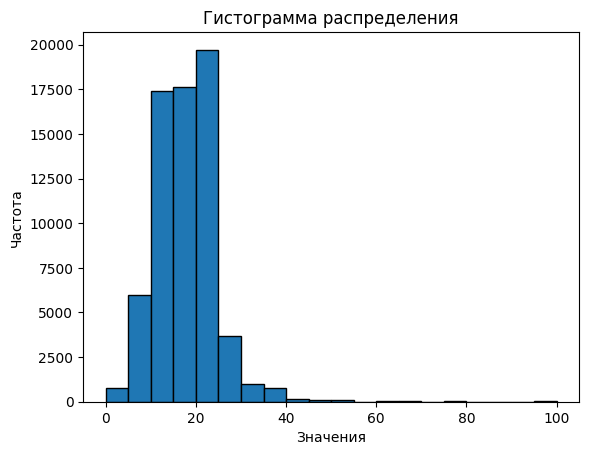

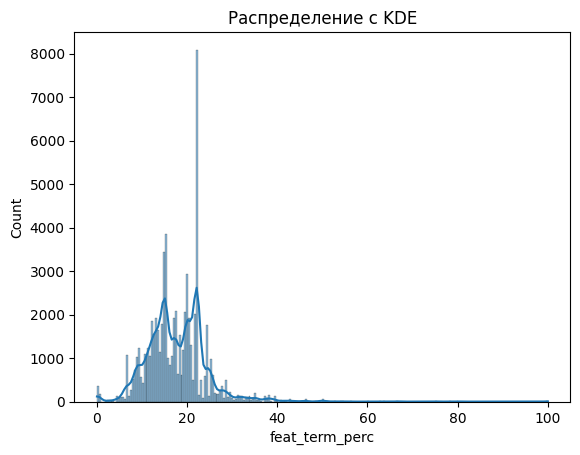

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Способ 1: Matplotlib
plt.hist(numeric_df['feat_term_perc'], bins=20, edgecolor='black')
plt.title('Гистограмма распределения')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

# Способ 2: Seaborn (более красивый)
sns.histplot(numeric_df['feat_term_perc'], kde=True)  # kde добавляет гладкую кривую
plt.title('Распределение с KDE')
plt.show()

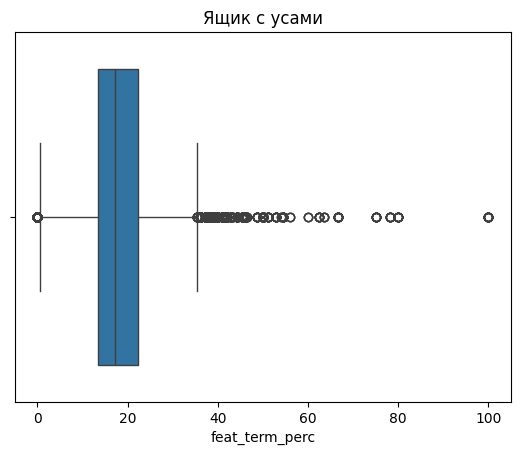

In [44]:
sns.boxplot(x=numeric_df['feat_term_perc'])
plt.title('Ящик с усами')
plt.show()

In [45]:
numeric_df['feat_term_perc'].value_counts()

,count
feat_term_perc,
22.24,7597
20.14,1942
24.52,1298
13.31,881
14.96,802
...,...
5.71,1
4.00,1
41.13,1


In [48]:
scaler = MinMaxScaler()
numeric_df[['feat_term_perc']] = scaler.fit_transform(numeric_df[['feat_term_perc']])

numeric_df

<ipython-input-48-9cbb11b4bfdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[['feat_term_perc']] = scaler.fit_transform(numeric_df[['feat_term_perc']])


,feat_class,feat_group_weeks,feat_group_size,feat_attendance,feat_HW,feat_HW_right,feat_theory_read,feat_TK,feat_LB,feat_tickets_we_need,feat_tickets_mb_term,feat_term_perc,feat_good_agr_before,target,feat_prep_attendence,feat_prep_HW,feat_prep_OpenLessons,feat_term_perc\t
0,0.5,0.419355,0.031088,1.00,0.79,0.73,0.32,1.0,0.111111,0.000000,0.0,0.2765,1,0,0.929787,0.737176,4.658626,0.2765
1,0.5,0.419355,0.031088,0.43,0.47,0.40,0.31,0.0,0.037037,0.000000,0.0,0.3443,1,1,0.929787,0.737176,4.658626,0.3443
2,0.5,0.419355,0.031088,1.00,0.25,0.24,0.22,1.0,0.111111,0.125000,0.0,0.2593,1,0,0.929787,0.737176,4.658626,0.2593
3,0.5,0.419355,0.031088,1.00,0.81,0.65,0.41,1.0,0.111111,0.041667,0.0,0.3443,1,0,0.929787,0.737176,4.658626,0.3443
4,0.5,0.419355,0.031088,1.00,0.24,0.21,0.56,1.0,0.111111,0.125000,0.0,0.2028,1,0,0.929787,0.737176,4.658626,0.2028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67333,0.0,0.548387,0.051813,0.90,0.26,0.22,0.06,0.4,0.037037,0.000000,0.0,0.2853,1,0,0.929787,0.930000,5.000000,0.2853
67334,0.0,0.548387,0.051813,0.95,0.42,0.36,0.23,0.5,0.074074,0.000000,0.0,0.1515,1,0,0.929787,0.930000,5.000000,0.1515
67335,0.0,0.548387,0.051813,1.00,0.65,0.53,1.00,0.8,0.074074,0.000000,0.0,0.1505,1,0,0.929787,0.930000,5.000000,0.1505
67336,0.0,0.548387,0.051813,1.00,0.81,0.56,1.00,1.0,0.000000,0.000000,0.0,0.1956,1,0,0.929787,0.930000,5.000000,0.1956


In [49]:
numeric_df # закодированный датасет с числовыми занчениями. Теперь необходимо соединить категориальные и числовые данные в один сет

,count
feat_good_agr_before,
1,63229
0,4109


In [51]:
final_dataset_prep = pd.concat([numeric_df, encoded_ohe_df], axis=1)

final_dataset_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67338 entries, 0 to 67337
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   feat_class                             67338 non-null  float64
 1   feat_group_weeks                       67338 non-null  float64
 2   feat_group_size                        67338 non-null  float64
 3   feat_attendance                        67338 non-null  float64
 4   feat_HW                                67338 non-null  float64
 5   feat_HW_right                          67338 non-null  float64
 6   feat_theory_read                       67338 non-null  float64
 7   feat_TK                                67338 non-null  float64
 8   feat_LB                                67338 non-null  float64
 9   feat_tickets_we_need                   67338 non-null  float64
 10  feat_tickets_mb_term                   67338 non-null  float64
 11  fe

                                       feat_class  feat_group_weeks  \
feat_class                               1.000000          0.141407   
feat_group_weeks                         0.141407          1.000000   
feat_group_size                         -0.070527          0.032759   
feat_attendance                          0.063299          0.055646   
feat_HW                                  0.029753          0.221731   
feat_HW_right                            0.081292          0.207971   
feat_theory_read                         0.181260          0.103303   
feat_TK                                 -0.011904          0.010613   
feat_LB                                  0.100364          0.236117   
feat_tickets_we_need                    -0.072270          0.019397   
feat_tickets_mb_term                    -0.021468          0.010424   
feat_term_perc                          -0.100668         -0.048629   
feat_good_agr_before                     0.062036          0.034301   
target

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


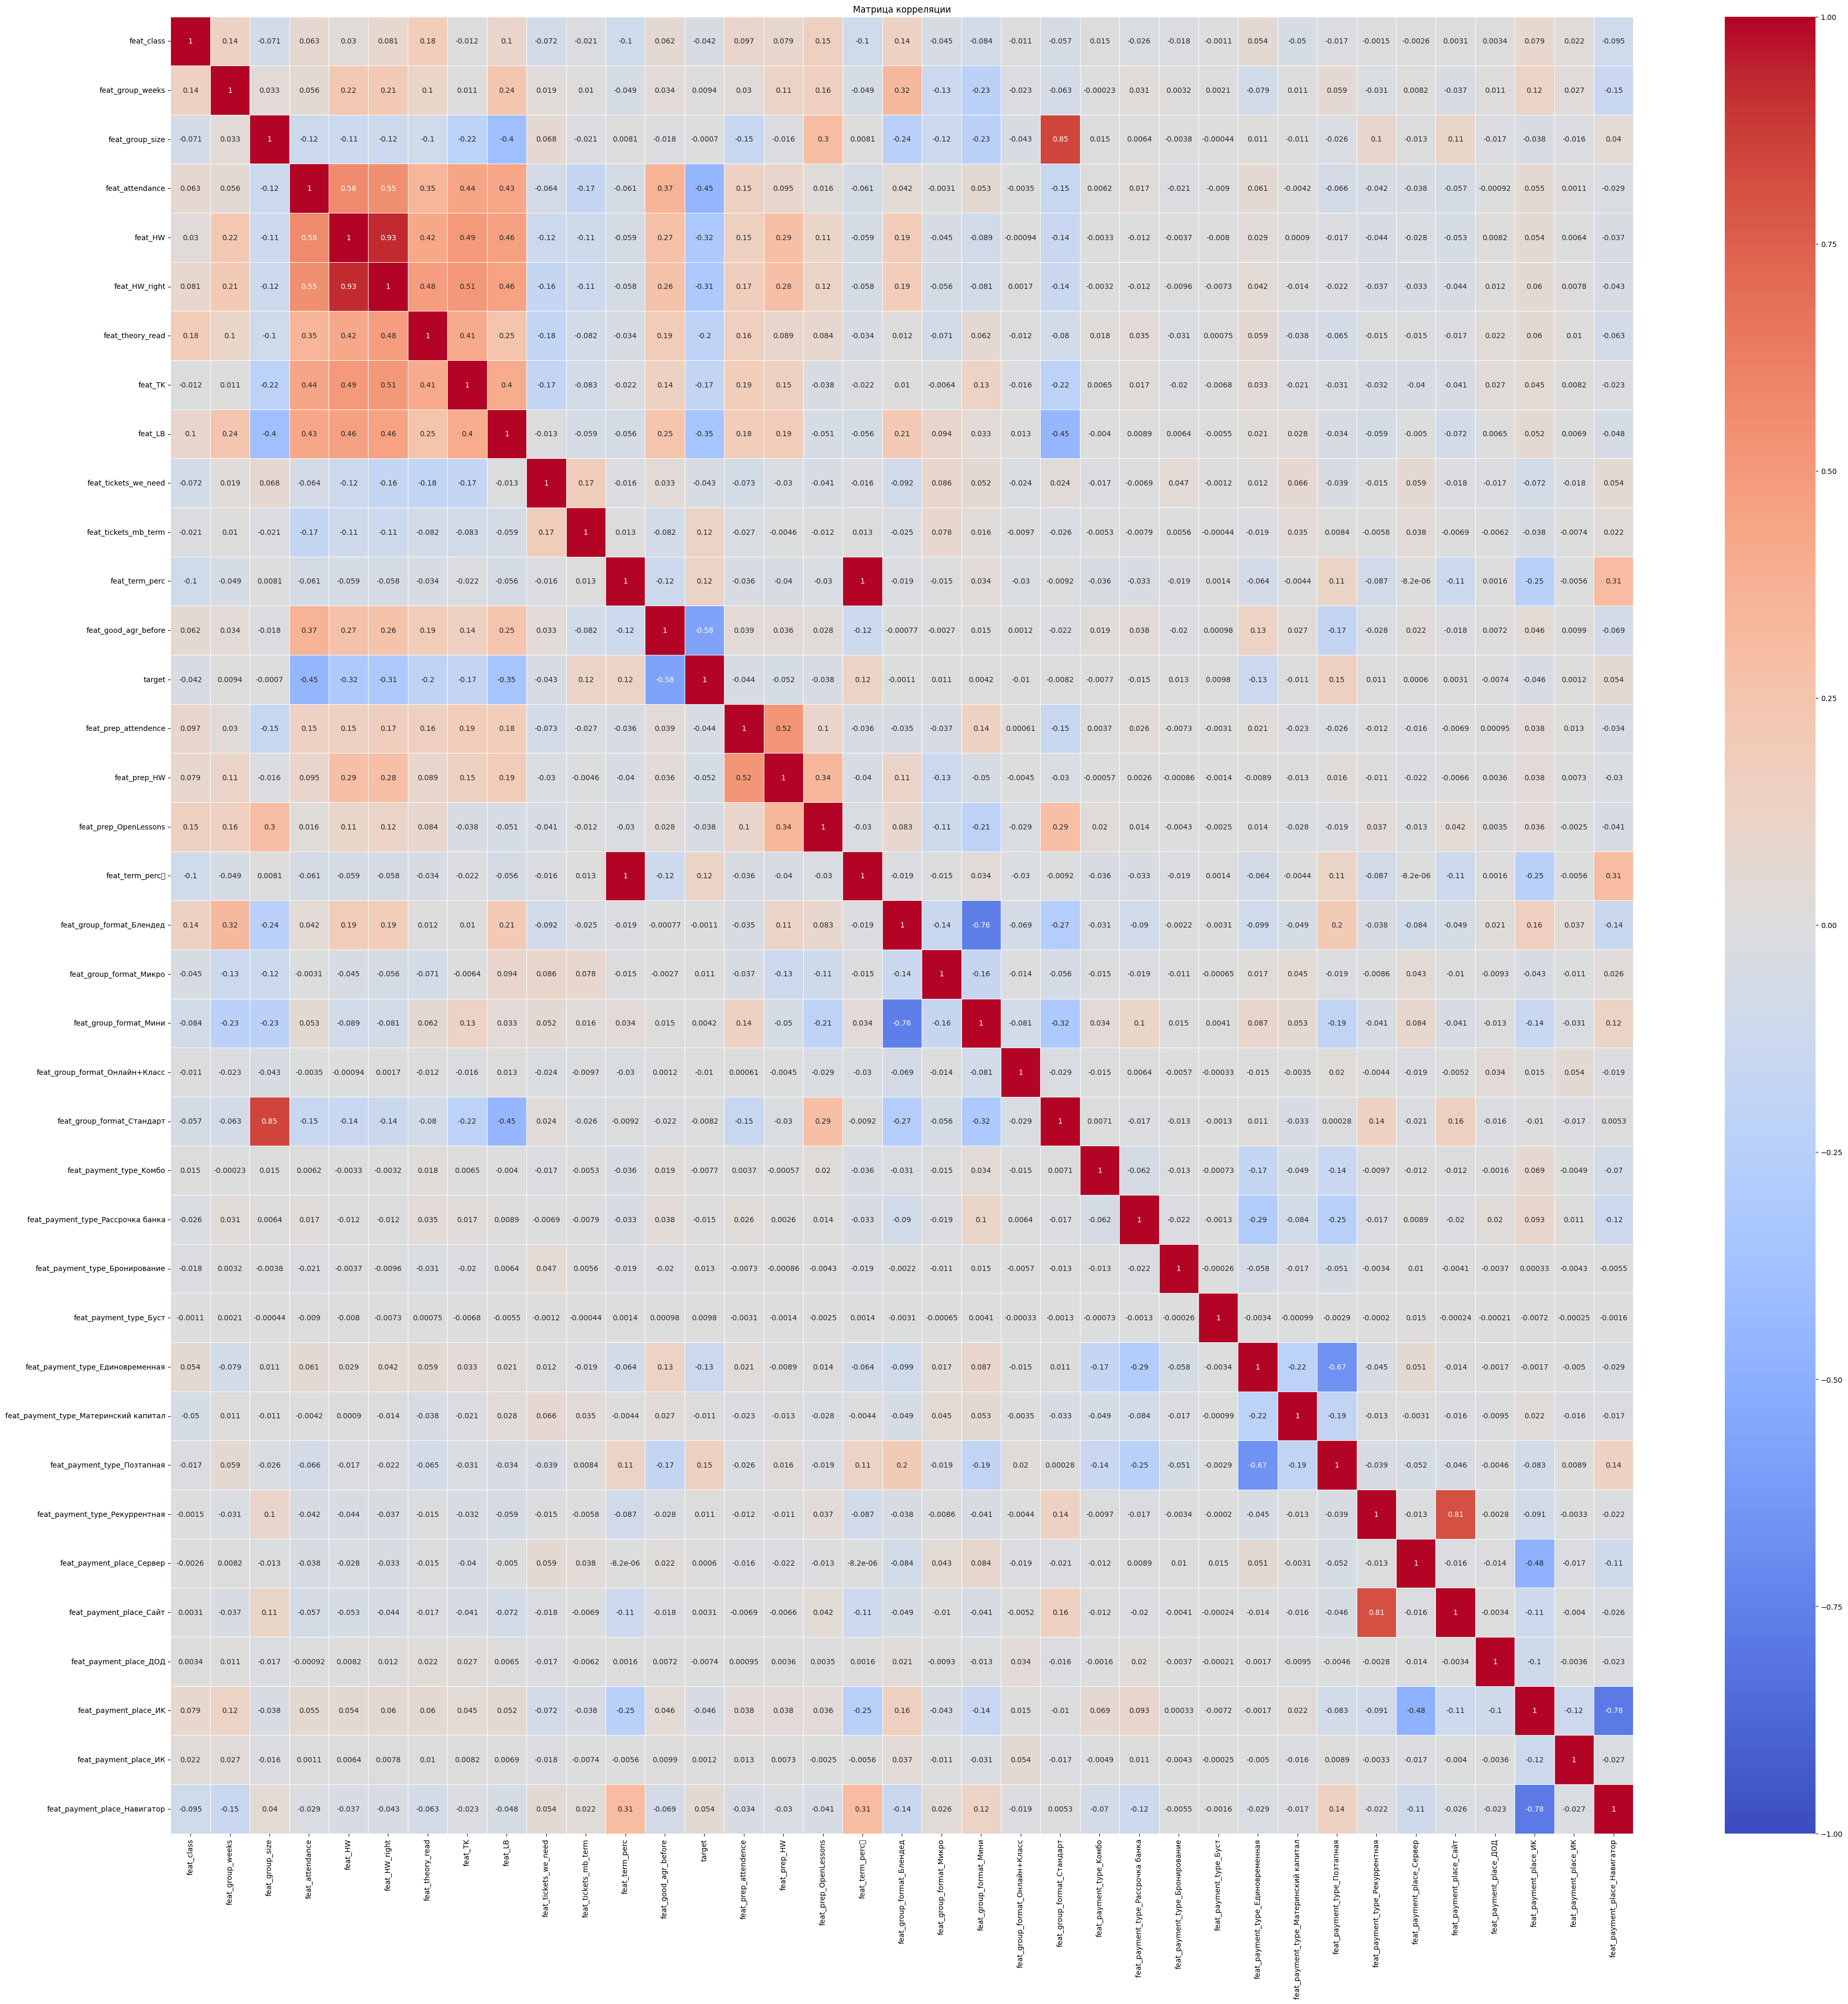

In [57]:
corr_matrix = final_dataset_prep.corr()
print(corr_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(45, 45))
sns.heatmap(
    corr_matrix,
    annot=True,  # Показывать значения в ячейках
    cmap='coolwarm',  # Цветовая схема
    vmin=-1, vmax=1,  # Диапазон для шкалы
    linewidths=0.5    # Границы между ячейками
)
plt.title('Матрица корреляции')
plt.show()

In [ ]:
# удалить столбцы, которые не коррелируют с таргетом (категориальыне данные)
# решить проблему дисбалансов классов